In [2]:


%matplotlib inline  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# A bit nicer style
sns.set(style="whitegrid")

# Load cleaned dataset
df = pd.read_csv("Data/clean_mortality_2004_2023.csv")

# Ensure Year is integer (important for plots)
df["Year"] = df["Year"].astype(int)

df.head()


,State,Year,Ten-Year Age Groups,Race,Sex,Deaths,Population,Source_File,Unreliable_Flag,CrudeRate_Reported,Age_Min,Age_Max,Age_Mid,CrudeRate_Calculated
0,Alabama,2004,15-24 years,White,Male,14,219849,2004-2017,1,NaN,15,24,19.5,6.368007
1,Alabama,2004,35-44 years,White,Male,14,236652,2004-2017,1,NaN,35,44,39.5,5.915860
2,Alabama,2004,45-54 years,White,Male,14,235425,2004-2017,1,NaN,45,54,49.5,5.946692
3,Alabama,2005,15-24 years,White,Male,12,221256,2004-2017,1,NaN,15,24,19.5,5.423582
4,Alabama,2005,25-34 years,White,Male,11,207085,2004-2017,1,NaN,25,34,29.5,5.311828


Shape: (10319, 14)

Columns:
 ['State', 'Year', 'Ten-Year Age Groups', 'Race', 'Sex', 'Deaths', 'Population', 'Source_File', 'Unreliable_Flag', 'CrudeRate_Reported', 'Age_Min', 'Age_Max', 'Age_Mid', 'CrudeRate_Calculated']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10319 entries, 0 to 10318
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 10319 non-null  object 
 1   Year                  10319 non-null  int32  
 2   Ten-Year Age Groups   10319 non-null  object 
 3   Race                  10319 non-null  object 
 4   Sex                   10319 non-null  object 
 5   Deaths                10319 non-null  int64  
 6   Population            10319 non-null  int64  
 7   Source_File           10319 non-null  object 
 8   Unreliable_Flag       10319 non-null  int64  
 9   CrudeRate_Reported    7452 non-null   float64
 10  Age_Min               10319 non-null  int64 

,Year,Deaths,Population,Unreliable_Flag,CrudeRate_Reported,Age_Min,Age_Max,Age_Mid,CrudeRate_Calculated
count,10319.000000,10319.000000,1.031900e+04,10319.000000,7452.000000,10319.000000,10319.000000,10319.000000,10319.000000
mean,2015.500533,64.930613,3.390032e+05,0.277837,33.578731,38.064832,47.064250,42.564541,30.161569
std,5.646529,91.015606,3.527564e+05,0.447954,39.858283,14.901719,14.903282,14.902471,40.087418
min,2004.000000,10.000000,3.875000e+03,0.000000,1.200000,1.000000,4.000000,2.500000,0.668752
25%,2011.000000,18.000000,1.160410e+05,0.000000,11.600000,25.000000,34.000000,29.500000,9.322410
50%,2017.000000,35.000000,2.317090e+05,0.000000,19.950000,35.000000,44.000000,39.500000,16.610192
75%,2020.000000,73.000000,3.981475e+05,1.000000,38.500000,45.000000,54.000000,49.500000,33.345105
max,2023.000000,1290.000000,2.264572e+06,1.000000,517.900000,85.000000,94.000000,89.500000,517.943026



Missing values (%):
CrudeRate_Reported      27.7837
State                    0.0000
Year                     0.0000
Ten-Year Age Groups      0.0000
Race                     0.0000
Sex                      0.0000
Deaths                   0.0000
Population               0.0000
Source_File              0.0000
Unreliable_Flag          0.0000
Age_Min                  0.0000
Age_Max                  0.0000
Age_Mid                  0.0000
CrudeRate_Calculated     0.0000
dtype: float64


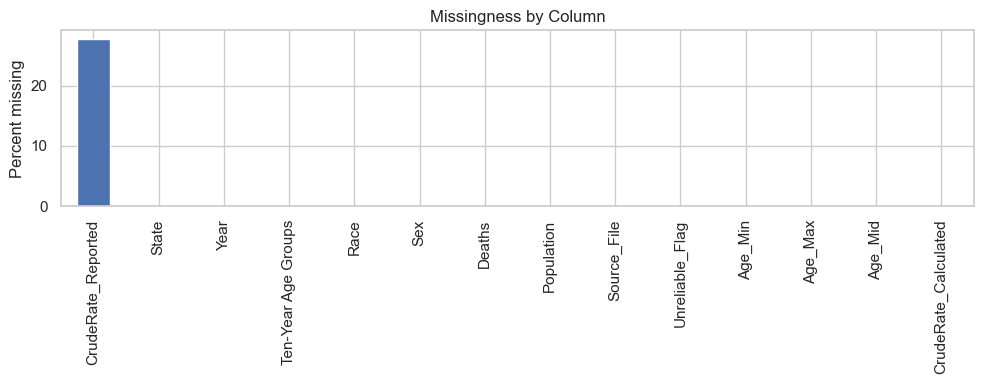

In [3]:
#  Basic info & missingness

print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())

print("\nInfo:")
print(df.info())

print("\nNumeric summary:")
display(df.describe())

# Missingness by column (in %)
missing_pct = df.isna().mean().sort_values(ascending=False) * 100
print("\nMissing values (%):")
print(missing_pct)

# Quick bar plot of missingness (optional)
plt.figure(figsize=(10, 4))
missing_pct.plot(kind="bar")
plt.ylabel("Percent missing")
plt.title("Missingness by Column")
plt.tight_layout()
plt.show()


,Year,Total_Deaths,Total_Population,National_CrudeRate_100k
0,2004,9579,124943667,7.666655
1,2005,10722,134007534,8.001043
2,2006,13449,143584143,9.366633
3,2007,14387,147593134,9.747743
4,2008,15206,150921685,10.075424


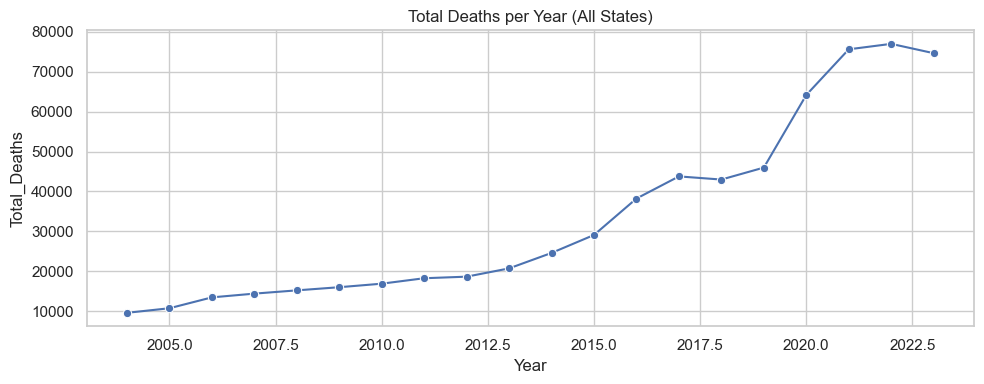

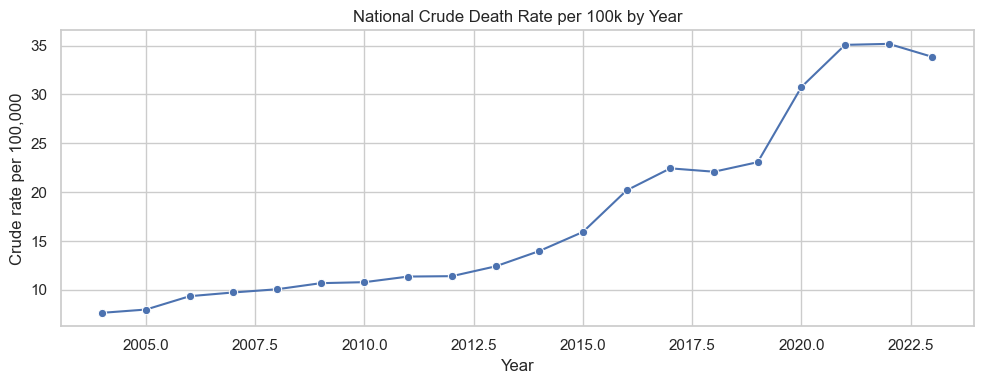

In [4]:
# Cell 3: Yearly trends - total deaths & national crude rate

# Total deaths per year (all states, all groups)
deaths_year = (
    df.groupby("Year")["Deaths"]
    .sum()
    .reset_index()
    .rename(columns={"Deaths": "Total_Deaths"})
)

# Total population per year
pop_year = (
    df.groupby("Year")["Population"]
    .sum()
    .reset_index()
    .rename(columns={"Population": "Total_Population"})
)

yearly = deaths_year.merge(pop_year, on="Year")
yearly["National_CrudeRate_100k"] = (
    yearly["Total_Deaths"] / yearly["Total_Population"] * 100000
)

display(yearly.head())

# Plot deaths per year
plt.figure(figsize=(10, 4))
sns.lineplot(data=yearly, x="Year", y="Total_Deaths", marker="o")
plt.title("Total Deaths per Year (All States)")
plt.tight_layout()
plt.show()

# Plot national crude rate per year
plt.figure(figsize=(10, 4))
sns.lineplot(data=yearly, x="Year", y="National_CrudeRate_100k", marker="o")
plt.title("National Crude Death Rate per 100k by Year")
plt.ylabel("Crude rate per 100,000")
plt.tight_layout()
plt.show()


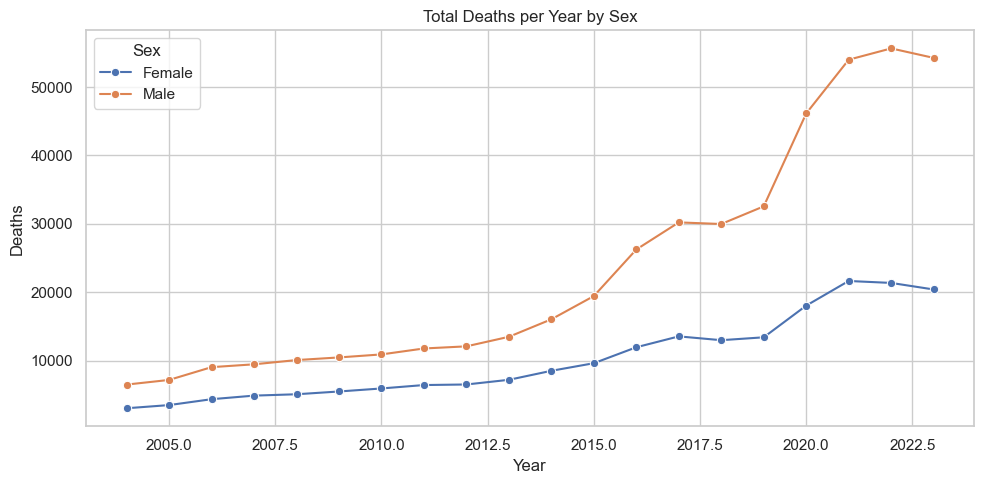

In [5]:
# Cell 4: Yearly trends by Sex

deaths_sex_year = (
    df.groupby(["Year", "Sex"])["Deaths"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(10, 5))
sns.lineplot(
    data=deaths_sex_year,
    x="Year",
    y="Deaths",
    hue="Sex",
    marker="o"
)
plt.title("Total Deaths per Year by Sex")
plt.tight_layout()
plt.show()


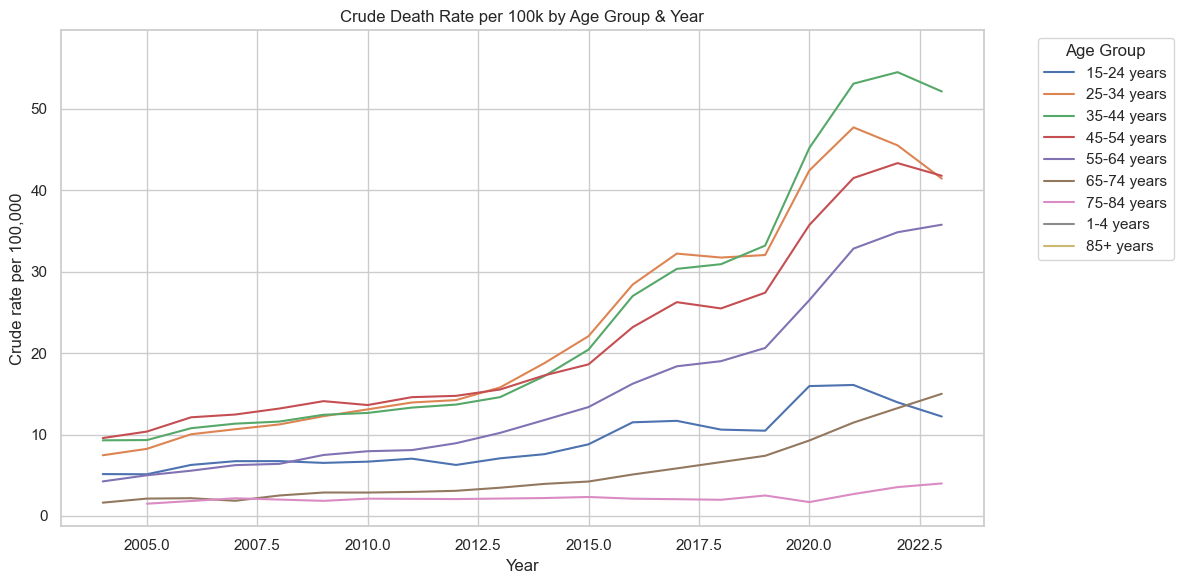

In [6]:
# Cell 5: Crude rate by age group over time

age_year = (
    df.groupby(["Year", "Ten-Year Age Groups"])
      .agg(Total_Deaths=("Deaths", "sum"),
           Total_Pop=("Population", "sum"))
      .reset_index()
)
age_year["CrudeRate_100k"] = age_year["Total_Deaths"] / age_year["Total_Pop"] * 100000

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=age_year,
    x="Year",
    y="CrudeRate_100k",
    hue="Ten-Year Age Groups"
)
plt.title("Crude Death Rate per 100k by Age Group & Year")
plt.ylabel("Crude rate per 100,000")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="Age Group")
plt.tight_layout()
plt.show()


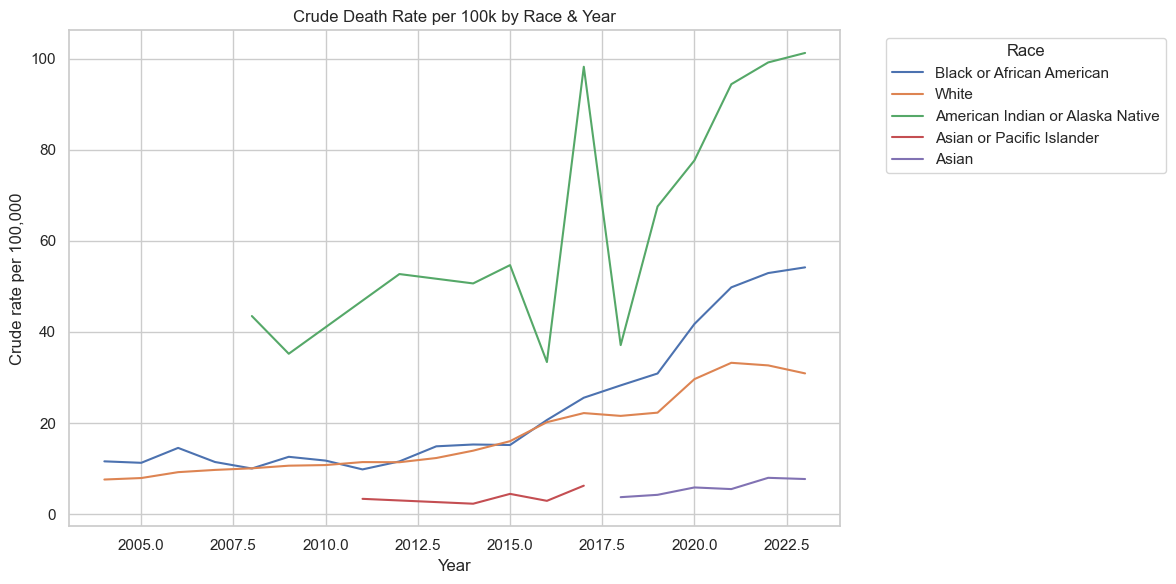

In [7]:
# Cell 6: Crude rate by Race over time

race_year = (
    df.groupby(["Year", "Race"])
      .agg(Total_Deaths=("Deaths", "sum"),
           Total_Pop=("Population", "sum"))
      .reset_index()
)
race_year["CrudeRate_100k"] = race_year["Total_Deaths"] / race_year["Total_Pop"] * 100000

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=race_year,
    x="Year",
    y="CrudeRate_100k",
    hue="Race"
)
plt.title("Crude Death Rate per 100k by Race & Year")
plt.ylabel("Crude rate per 100,000")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="Race")
plt.tight_layout()
plt.show()


In [18]:
fig = px.choropleth(
    state_latest,
    locations="State_Abbrev",
    locationmode="USA-states",
    color="CrudeRate_100k",
    color_continuous_scale="Reds",
    scope="usa",
    labels={"CrudeRate_100k": "Crude Rate (per 100k)"},
    hover_name="State_Abbrev",
    hover_data={"Deaths": True, "Population": True, "CrudeRate_100k": True}
)

fig.update_layout(
    title_text=f"Crude Death Rate per 100k by State ({latest_year})",
    title_x=0.5
)

fig.show()


Latest year in data: 2023

Top 10 states by crude rate in 2023


,State,Total_Deaths,Total_Pop,CrudeRate_100k
8,District of Columbia,300,177600,168.918919
47,West Virginia,1125,1144555,98.291476
1,Alaska,182,211140,86.198731
7,Delaware,425,495713,85.735093
44,Vermont,209,311919,67.004575
39,Rhode Island,276,458463,60.201150
41,Tennessee,2852,5039040,56.598082
19,Maine,469,835166,56.156501
11,Hawaii,27,51426,52.502625
31,New Mexico,658,1254583,52.447706



Bottom 10 states by crude rate in 2023


,State,Total_Deaths,Total_Pop,CrudeRate_100k
15,Iowa,170,1420568,11.967044
27,Nebraska,28,224706,12.460726
42,Texas,3036,20675076,14.684347
3,Arkansas,251,1428832,17.566796
16,Kansas,356,1902630,18.710942
43,Utah,442,2137044,20.682775
12,Idaho,213,1023772,20.805414
10,Georgia,1827,7487448,24.400837
23,Minnesota,880,3593358,24.489628
26,Montana,51,193290,26.385224


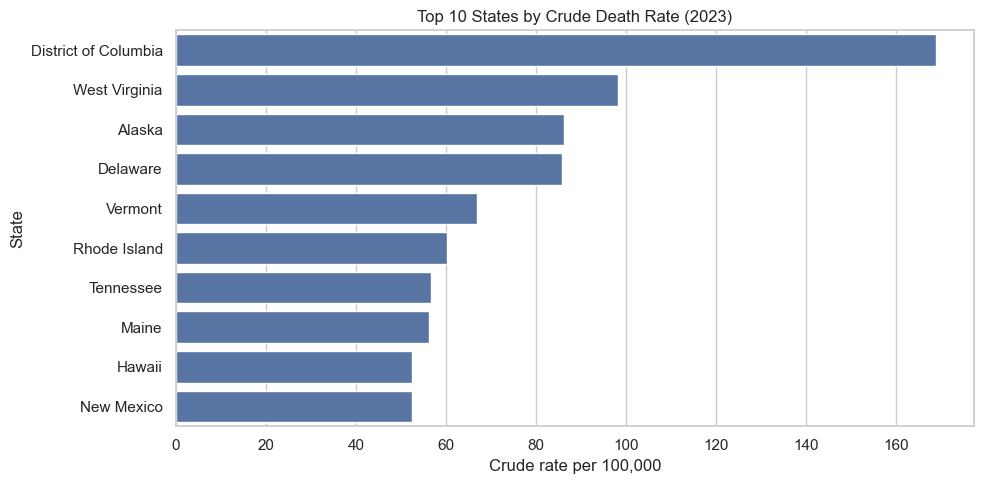

In [9]:
# Cell 8: Top & bottom states by crude rate in the most recent year

latest_year = df["Year"].max()
print("Latest year in data:", latest_year)

latest = (
    df[df["Year"] == latest_year]
      .groupby("State")
      .agg(Total_Deaths=("Deaths", "sum"),
           Total_Pop=("Population", "sum"))
      .reset_index()
)
latest["CrudeRate_100k"] = latest["Total_Deaths"] / latest["Total_Pop"] * 100000

top10 = latest.sort_values("CrudeRate_100k", ascending=False).head(10)
bottom10 = latest.sort_values("CrudeRate_100k", ascending=True).head(10)

print("\nTop 10 states by crude rate in", latest_year)
display(top10)

print("\nBottom 10 states by crude rate in", latest_year)
display(bottom10)

plt.figure(figsize=(10, 5))
sns.barplot(data=top10, x="CrudeRate_100k", y="State")
plt.title(f"Top 10 States by Crude Death Rate ({latest_year})")
plt.xlabel("Crude rate per 100,000")
plt.tight_layout()
plt.show()
